## Predator and Prey: The mathematics of a balanced ecosystem


In this notebook we will a simple population equation [1]

In [1]:
## Library
import numpy as np
import math 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import matplotlib.gridspec as gridspec # subplots
import warnings
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

## Predators and prey
The cyclical relationship of Predators and Prey in the wild  means that when there is an abundance of prey, the predators will eat more and their population will increase. On the other hand, if there is a shortage in the number of prey, the number of predators will decrease. One of the of the most famous examples of this was observed by the fur traders  Hudson's Bay Company of Canada. The company collected data about the number of lynx and hare pelts they purchased over a 90 year period. Their data showed the cylical nature of the predator prey relationship (Figure below).

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


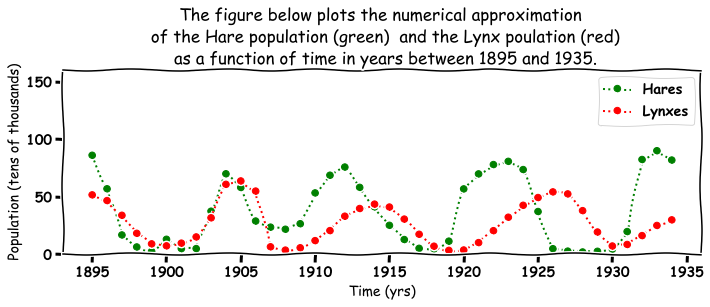

In [20]:
Pred_prey_data=pd.read_csv('hare_lynx_data.csv')  

## Plotting Figure
with plt.xkcd():
    fig = plt.figure(1,figsize=(10,4))

    ax = fig.add_subplot(1,1,1)

    ax.plot(Pred_prey_data.Year[50:-1],Pred_prey_data.Hare[50:-1],'o:',color='green',label='Hares')
    ax.plot(Pred_prey_data.Year[50:-1],Pred_prey_data.Lynx[50:-1],'o:',color='red',label='Lynxes')

    ax.legend()
    ax.set_xlabel('Time (yrs)')
    ax.set_ylabel('Population (tens of thousands)')
    #ax.legend(loc='best')
    ax.set_title('The figure below plots the numerical approximation \n of the Hare population (green)  and the Lynx poulation (red)\n as a function of time in years between 1895 and 1935.')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.ylim(0,160)
    plt.savefig('HudsonBaySinglePlot.eps', format='eps')
    plt.show()



<em><center> Figure 1: The Lynx-Hare Cycle  [1]. </center></em>
This kind of behaviour has been observed in many pairs of predators and prey from mammals to fish to beyond. 

## Snow Hares and Lynxes
In a balanced eco system the relationship between snow hares (prey) and lynxes (predator) can be described mathematically using a Loketta-Volterra model [1-3]
\begin{equation}
\begin{array}{cl}
\frac{d H}{dt}=a_{Birth} H-b_{Con}LH,\\
\frac{d L}{dt}=-c_{Death}L+d_{Food} L H,\\
\end{array}
\end{equation}
this set of equations models the interaction between snow hares (H) and lynxes (L). The lynes are the predators who eat the snow hares to survive. Where there parameters 
* $a_{Birth}$ is the birth rate of the snow hares;
* $b_{Con}$ is the consumation rate of snow hares by lynxes (interaction);
* $c_{Death}$ is the death rate of lynxes if there is no food source;
* $d_{Food}$ is the rate that lynxes eat the snow hares to survive (interaction).


In [3]:
A=5.5
B=1.5
a_Birth=0.32*A
b_Con=0.01*A
c_Death=0.045*A*B
d_Food=0.001*A*B

print(c_Death/d_Food)
print(a_Birth/b_Con)

44.99999999999999
32.0


## Discrete Domain 
To numiercally approximate the solution we discretise the continuous domain using a step size, $h=1$, 
which gives
\begin{equation}
t_i=0+i h,
\end{equation}
for $i=0,...10$.
The figure below illustrate the discrete domain.

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


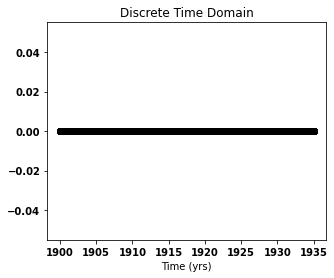

In [4]:
h=0.001
time=np.arange(1900,1935+h/2,h)
#t=Pred_prey_data.Year
fig = plt.figure(1,figsize=(5,4))
ax = fig.add_subplot(1,1,1)
ax.plot(time,0*time,'o:',color='k')
ax.set_xlabel('Time (yrs)')
plt.title('Discrete Time Domain')
plt.show()

In [5]:
N=len(time) # Number of Steps
H=np.zeros(N) # Numerical Solution Hares
H[0]=Pred_prey_data.Hare[50]# Intial Hare population
L=np.zeros(N) # Numerical Solution Lynxes
L[0]=Pred_prey_data.Lynx[50]# Initial Lynx population



We numerically approximate the differential equation using Eulers method to give the difference equation
\begin{equation}
H[i+1] = H[i]+ h*\big(a_{Birth}*H[i]-b_{Con}*H[i]*L[i] \big)
\end{equation}

\begin{equation}
L[i+1] = L[i]+ h*\big(-c_{Death}*H[i]+d_{Food}*H[i]*L[i] \big)
\end{equation}
where $h$ is the stepsize and  $H[i]$ and $L[i]$ is the numerical approximation of the hare $H(t_i)$ and Lynx $L(t_i)$ at time $t_i$, for $i=0,...,N$


In [6]:
for i in range (0,N-1):
    H[i+1]=H[i]+h*(a_Birth*H[i]-b_Con*H[i]*L[i])# INSERT EQUATION HERE 
    L[i+1]=L[i]+h*(-c_Death*L[i]+d_Food*H[i]*L[i])# INSERT EQUATION HERE 



## Results
The figure below plots the numerical approximation of the Hare population (green) and the Lynx poulation (red) as a function of time in years between 1850 and 1925.
The figure illustrates the oscilatory nature of the Hare and Lynx populations.
The hare population fluctuates from close to 0 to 800 ten of thousands.
The lynx population fluctuates from close to 0 to 120 ten of thousands.
The peak hare population preceeds the lynx population by about half a year.
There is a gradual increase of peak populations over time.
The model is similar to the observed data by the Hudson Bay Company.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


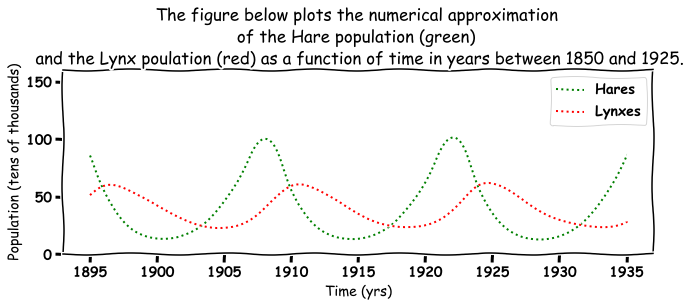

In [21]:
with plt.xkcd():
    ## Plotting Figure
    fig = plt.figure(1,figsize=(10,4))

    ax = fig.add_subplot(1,1,1)

    ax.plot(time,H,':',color='green',label='Hares')
    ax.plot(time,L,':',color='red',label='Lynxes')

    ax.legend()
    ax.set_xlabel('Time (yrs)')
    ax.set_ylabel('Population (tens of thousands)')
    ax.legend(loc='best')
    ax.set_title('The figure below plots the numerical approximation \n of the Hare population (green)  \nand the Lynx poulation (red) as a function of time in years between 1850 and 1925.')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.ylim(0,160)
    plt.savefig('PredPreySinglePlot.eps', format='eps')


    plt.show()


## Phase Plane Plot
The phase plane plot below illustrates the population of Hares as a function of Lynxes. This removes time from out plot.
The rate of change of hares as function of the rate of lynxes is written as
\begin{equation}
\frac{d H}{dL}=\frac{a_{Birth} H-b_{Con}LH}{-c_{Death}L+d_{Food} L H}.
\end{equation}

The plot below shows a stable cyclical relationship between hares and lynxes.
It looks a bit like an orbit of a moon.

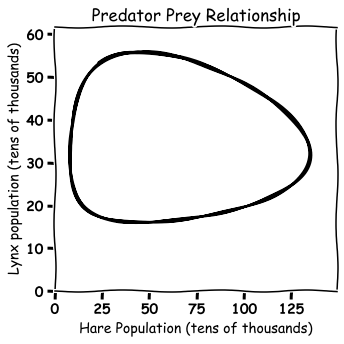

In [8]:
with plt.xkcd():
    ## Plotting Figure
    fig = plt.figure(1,figsize=(5,5))

    ax = fig.add_subplot(1,1,1)

    ax.plot(H,L,'-',color='black')

    ax.set_ylabel('Lynx population (tens of thousands)')
    ax.set_xlabel('Hare Population (tens of thousands)')
    #ax.legend(loc='best')
    ax.set_title('Predator Prey Relationship')
    plt.tight_layout()
    plt.ylim(0,1.1*np.max(L))
    plt.xlim(0,1.1*np.max(H))

    plt.show()

# References

[1] Stover, Christopher and Weisstein, Eric W. "Population Growth." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/PopulationGrowth.html

[2]  Vito Volterra.  Fluctuations in the abundance of a species considered mathematically. Nature,118:558–560,1926.

[3] Alfred J Lotka.   Analytical note on certain rhythmic  relations inorganic  systems.Proceedings of the National Academy of Sciences,6(7):410–415,1920.

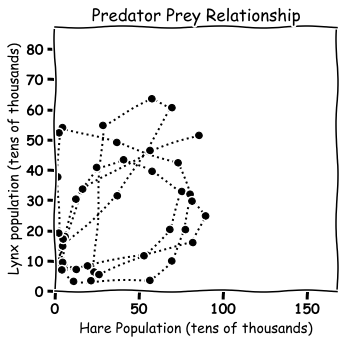

In [9]:
with plt.xkcd():
    ## Plotting Figure
    fig = plt.figure(1,figsize=(5,5))

    ax = fig.add_subplot(1,1,1)

    ax.plot(Pred_prey_data.Hare[50:-1],Pred_prey_data.Lynx[50:-1],':o',color='black')

    ax.set_ylabel('Lynx population (tens of thousands)')
    ax.set_xlabel('Hare Population (tens of thousands)')
    #ax.legend(loc='best')
    ax.set_title('Predator Prey Relationship')
    plt.tight_layout()
    plt.ylim(0,1.1*np.max(Pred_prey_data.Lynx))
    plt.xlim(0,1.1*np.max(Pred_prey_data.Hare))

    plt.show()


Parameter Value        Standard Deviation
a         9.268446e-01 1.824030e-01
b         2.358260e-02 4.398389e-03
c         2.380421e-01 4.844711e-02
d         5.451740e-03 1.248926e-03
Status message         b'ABNORMAL_TERMINATION_IN_LNSRCH'
Number of iterations   15
Objective              <symfit.core.objectives.LeastSquares object at 0x7f9e928d25f8>
Minimizer              <symfit.core.minimizers.LBFGSB object at 0x7f9e90f291d0>

Goodness of fit qualifiers:
chi_squared            55727.034099826415
objective_value        27863.517049913207
r_squared              -0.13655138312874993
[[ 3.32708473e-02  6.46615770e-04 -8.47795134e-03 -1.36749607e-04]
 [ 6.46615770e-04  1.93458268e-05 -1.64883529e-04 -2.51645591e-06]
 [-8.47795134e-03 -1.64883529e-04  2.34712283e-03  4.69596633e-05]
 [-1.36749607e-04 -2.51645591e-06  4.69596633e-05  1.55981669e-06]]


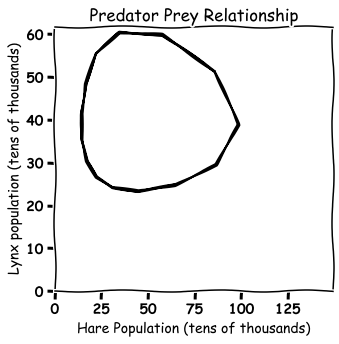

In [10]:

from symfit import variables, parameters, ODEModel, Fit, D
import numpy as np
from matplotlib import pyplot as plt
# define ODE model
a, b, c,d = parameters('a, b,  c,d')
s, x, t = variables(' s, x, t')
model_dict = {
    D(x, t): a * x - b * s * x,
    D(s, t): -c * s + d*s * x
}

ode_model = ODEModel(model_dict, initial={t:0.0, x:np.array(Pred_prey_data.Hare[50]), s:np.array(Pred_prey_data.Lynx[50])})

# Generate noisy measurement data
tSample = np.array(time-time[0]) #np.array([1, 2, 4, 6, 8, 12])
tSample = np.array(Pred_prey_data.Year[50:-1]-Pred_prey_data.Year[50]) #np.array([1, 2, 4, 6, 8, 12])

A=3
B=2.5
a_Birth=0.32*A
b_Con=0.01*A
c_Death=0.045*A*B
d_Food=0.001*A*B



sSample, xSample = ode_model(t=tSample, a=0.32*A, b=0.01*A, c=0.045*A*B,d=0.001*A*B)
xRelErr = 0.05
sRelErr = 0.10
xNoise = np.array(Pred_prey_data.Hare[50:-1])#xSample + xSample * xRelErr * np.random.randn(xSample.size)
sNoise = np.array(Pred_prey_data.Lynx[50:-1])#sSample + sSample * sRelErr * np.random.randn(sSample.size)
#xNoise = xSample + xSample * xRelErr * np.random.randn(xSample.size)
#sNoise = sSample + sSample * sRelErr * np.random.randn(sSample.size)

#xNoise = np.array(H)+ xSample * xRelErr * np.random.randn(xSample.size)
#sNoise = np.array(L) + sSample * sRelErr * np.random.randn(sSample.size)


# constraints for parameters
a.min = 0.0
b.min = 0.0
c.min = 0.0
d.min = 0.0

# initial guesses for parameters
b.value = 0.01*A
a.value = 0.32*A
d.value =0.001*A*B
c.value = 0.045*A*B

# perform fitting
fit = Fit(ode_model, t=tSample, x=xNoise, s=sNoise)
fit_result = fit.execute()

# show fit
print(fit_result)
print(fit_result.covariance_matrix)

sSample, xSample = ode_model(t=tSample, a=fit_result.params['a'], b=fit_result.params['b'],
                             c=fit_result.params['c'],d=fit_result.params['d'])



with plt.xkcd():
    ## Plotting Figure
    fig = plt.figure(1,figsize=(5,5))

    ax = fig.add_subplot(1,1,1)

    ax.plot(xSample,sSample,'-',color='black')

    ax.set_ylabel('Lynx population (tens of thousands)')
    ax.set_xlabel('Hare Population (tens of thousands)')
    #ax.legend(loc='best')
    ax.set_title('Predator Prey Relationship')
    plt.tight_layout()
    plt.ylim(0,1.1*np.max(L))
    plt.xlim(0,1.1*np.max(H))

    plt.show()

In [11]:
fit_result.params

OrderedDict([('a', 0.9268445743524578),
             ('b', 0.023582602330246113),
             ('c', 0.2380420638917277),
             ('d', 0.005451739856534623)])

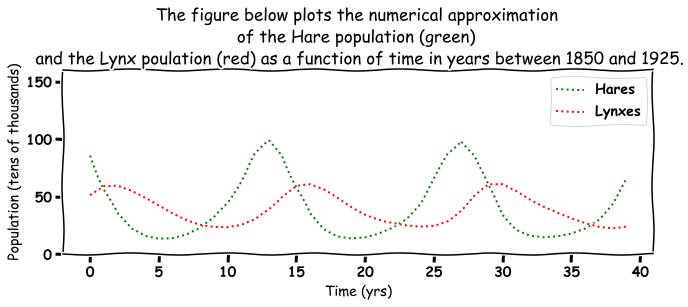

In [12]:
with plt.xkcd():
    ## Plotting Figure
    fig = plt.figure(1,figsize=(10,4))

    ax = fig.add_subplot(1,1,1)

    ax.plot(xSample,':',color='green',label='Hares')
    ax.plot(sSample,':',color='red',label='Lynxes')

    ax.legend()
    ax.set_xlabel('Time (yrs)')
    ax.set_ylabel('Population (tens of thousands)')
    ax.legend(loc='best')
    ax.set_title('The figure below plots the numerical approximation \n of the Hare population (green)  \nand the Lynx poulation (red) as a function of time in years between 1850 and 1925.')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.ylim(0,160)
    plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


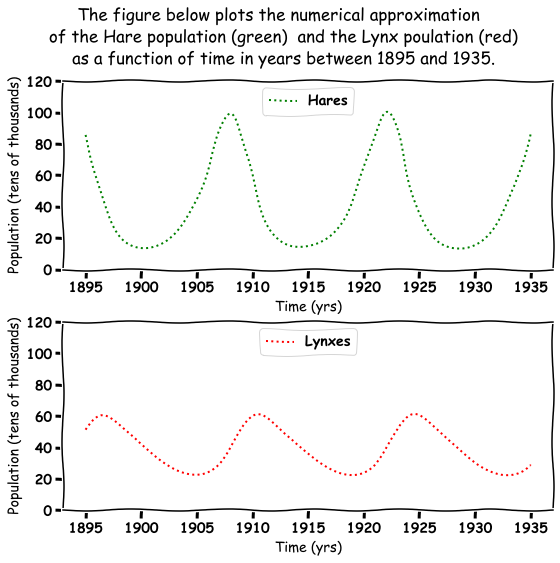

In [13]:
h=0.01
time=np.arange(1895,1935+h/2,h)


N=len(time) # Number of Steps
H=np.zeros(N) # Numerical Solution Hares
H[0]=Pred_prey_data.Hare[50]# Intial Hare population
L=np.zeros(N) # Numerical Solution Lynxes
L[0]=Pred_prey_data.Lynx[50]# Initial Lynx population

for i in range (0,N-1):
    H[i+1]=H[i]+h*(fit_result.params['a']*H[i]-fit_result.params['b']*H[i]*L[i])# INSERT EQUATION HERE 
    L[i+1]=L[i]+h*(-fit_result.params['c']*L[i]+fit_result.params['d']*H[i]*L[i])# INSERT EQUATION HERE 

grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)
with plt.xkcd():
    ## Plotting Figure
#    fig = plt.figure(1,figsize=(10,4))
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
   

   # axes[0].plot(time,H,':',color='green',label='Hares')
   # ax.plot(Pred_prey_data.Year[50:-1],Pred_prey_data.Hare[50:-1],'o-',color='green',label=' Real Hares')
  #  ax.plot(Pred_prey_data.Year[50:-1],Pred_prey_data.Lynx[50:-1],'o-',color='red',label=' RealLynxes')


    axes[0].plot(time,H,':',color='green',label='Hares')
    axes[0].legend()
    axes[0].set_xlabel('Time (yrs)')
    axes[0].set_ylabel('Population (tens of thousands)')
    axes[0].legend(loc='upper center')
  #  axes[0].set_title('The figure below plots the numerical approximation \n of the Hare population (green)  \nand the Lynx poulation (red) as a function of time in years between 1895 and 1935.')
    #axes[0].plot(time,L,':',color='red',label='Lynxes')
   # ax.plot(Pred_prey_data.Year[50:-1],Pred_prey_data.Hare[50:-1],'o-',color='green',label=' Real Hares')
  #  ax.plot(Pred_prey_data.Year[50:-1],Pred_prey_data.Lynx[50:-1],'o-',color='red',label=' RealLynxes')
    axes[0].set_ylim(0,120)
    #axes[0].plot(time,H,':',color='green',label='Hares')
    axes[1].plot(time,L,':',color='red',label='Lynxes')
   
    axes[1].legend()
    axes[1].set_xlabel('Time (yrs)')
    axes[1].set_ylabel('Population (tens of thousands)')
    axes[1].legend(loc='upper center')
    plt.suptitle('The figure below plots the numerical approximation \n of the Hare population (green)  and the Lynx poulation (red)\n as a function of time in years between 1895 and 1935.')
 
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.ylim(0,120)
    plt.savefig('PredPrey.eps', format='eps')




In [14]:
Pred_prey_data.Year[50]

1895

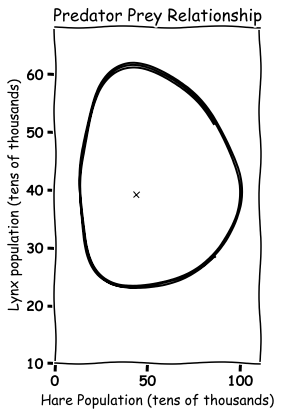

In [19]:
with plt.xkcd():
    ## Plotting Figure
    fig = plt.figure(1,figsize=(4,6))
   
    ax = fig.add_subplot(1,1,1)



    ax.plot(H,L,'-',color='black')
    ax.plot( fit_result.params['c']/fit_result.params['d'],fit_result.params['a']/fit_result.params['b'],'x',color='black')

    ax.set_ylabel('Lynx population (tens of thousands)')
    ax.set_xlabel('Hare Population (tens of thousands)')
    #ax.legend(loc='best')
    ax.set_title('Predator Prey Relationship')
    plt.tight_layout()
    plt.ylim(10,1.1*np.max(L))
    plt.xlim(0,1.1*np.max(H))

    plt.savefig('PhasePlane.eps', format='eps')

    plt.show()
   

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


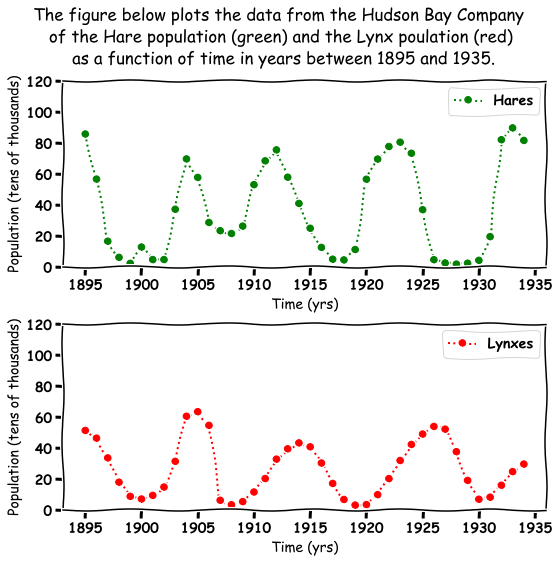

In [16]:
Pred_prey_data=pd.read_csv('hare_lynx_data.csv')  

## Plotting Figure
with plt.xkcd():
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
 

    axes[0].plot(Pred_prey_data.Year[50:-1],Pred_prey_data.Hare[50:-1],'o:',color='green',label='Hares')
    axes[0].legend()
    axes[0].set_ylim(0,120)
    axes[0].set_xlabel('Time (yrs)')
    axes[0].set_ylabel('Population (tens of thousands)')
    axes[1].plot(Pred_prey_data.Year[50:-1],Pred_prey_data.Lynx[50:-1],'o:',color='red',label='Lynxes')

    axes[1].legend()
    axes[1].set_ylim(0,120)
    axes[1].set_xlabel('Time (yrs)')
    axes[1].set_ylabel('Population (tens of thousands)')
    plt.suptitle('The figure below plots the data from the Hudson Bay Company \n of the Hare population (green) and the Lynx poulation (red) \n as a function of time in years between 1895 and 1935.')
 
    #ax.legend(loc='best')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    
    plt.savefig('HudsonBay.eps', format='eps')

    plt.show()